# Module 5 Webinar Examples

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom
import math
import warnings

warnings.filterwarnings('ignore')
sns.set_context('paper')
%matplotlib inline

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

## Independent samples t-test

In [2]:
scores1 = np.array([65, 65, 70, 67, 66, 63, 63, 68, 72, 71])
scores2 = np.array([66, 67, 70, 65, 68, 69, 66, 71, 74, 75])

t, p = stats.ttest_ind(scores1,scores2) # two-tailed test
print('t =', np.round(t,2))
print('p =', np.round(p,4))

t = -1.42
p = 0.1728


## repeated measures t-test example

In [7]:
# repeated measures t-test example
df = pd.DataFrame()
df['before'] = np.array([6.6, 6.5, 9.0, 10.3, 11.3, 8.1, 6.3, 11.6])
df['after'] = np.array([6.8, 2.4, 7.4, 8.5, 8.1, 6.1, 3.4, 2.0])
df['diff'] = df['after'] - df['before']

In [8]:
df

,before,after,diff
0,6.6,6.8,0.2
1,6.5,2.4,-4.1
2,9.0,7.4,-1.6
3,10.3,8.5,-1.8
4,11.3,8.1,-3.2
5,8.1,6.1,-2.0
6,6.3,3.4,-2.9
7,11.6,2.0,-9.6


In [9]:
print('mean = ', df['diff'].mean())
print('stdev = ', df['diff'].std())
n = df['diff'].shape[0]
print('df = ', n - 1)

print('\nmanual calculation:')
tscore = df['diff'].mean() / (df['diff'].std()/np.sqrt(n))
print('t-score = ', np.round(tscore,2))
print('p-value = ', stats.t.cdf(tscore, df=7).round(4))

print('\nscipy stats:')
res = stats.ttest_rel(df['after'], df['before'])
print('t-score = ', res.statistic.round(2))
print('p-value = ', np.round(res.pvalue/2,4)) # ttest_rel automatically does 2-tailed test

mean =  -3.125
stdev =  2.9114306743298166
df =  7

manual calculation:
t-score =  -3.04
p-value =  0.0095

scipy stats:
t-score =  -3.04
p-value =  0.0095


# Introduction to Inference for Categorical Variables

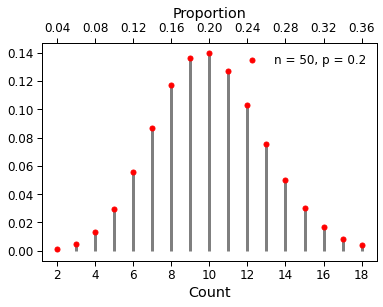

In [3]:
# plot binomial distribution

n = 50
p= .2
c = 'ro'

# first way 
x = np.arange(binom.ppf(0.001, n, p),binom.ppf(.999, n, p))
y1 = binom.pmf(x, n, p)

# second way
rv = binom(n, p)
y2 = rv.pmf(x)

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(x, y1, c, ms=5, label='n = {}, p = {}'.format(n,p))
ax.vlines(x, 0, y1, colors='k', lw=3, alpha=0.5)
ax.set_xlabel("Count")

xticks = ax.get_xticks()[1:-1]
#ax.set_xlim(xticks[0], xticks[-1])

ax2 = ax.twiny()

new_tick_locations = np.array([.2, .5, .9])

def tick_function(x,n):
    V = x/n
    return ["%.2f" % z for z in V]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(xticks)
ax2.set_xticklabels(tick_function(xticks,n))
ax2.set_xlabel("Proportion")

ax.legend(loc='best', frameon=False)
plt.show()

In [20]:
# print the mean and variance of the distribution

mean = n*p
var = n*p*(1-p)
print(mean,var)

10.0 8.0


In [21]:
# we can also calculate this using binom.stats:

mean, var = binom.stats(n, p)
print(mean, var)

10.0 8.0


## Example: Chequing account fees

Sara believes that 50% of bank customers pay fees on their chequing accounts. She performs a hypothesis test to determine if the percentage is the same or different from 50%. She samples 100 customers and 53 reply that they do pay fees on their accounts. For her hypothesis test, she uses a 1% significance level.

We will write a custom z-test function, because the python function called `ztest_proportion` uses the sample proportion, when it should be using the population proportion that is proposed in the null hypothesis.

In [4]:
def ztest_prop_custom(x,n,p,tail):
    
    # check success-failure condition
    if n*p < 10 or n*(1-p) < 10:
        print('Success-failure condition not met. Do not use this test.')
        return
    z = (x/n - p) / np.sqrt((p *(1-p))/n)
    if tail == 'left':
        p = stats.norm.cdf(z)
    elif tail == 'right':
        p = 1 - stats.norm.cdf(z)
    elif tail == 'two':
        p = 2* stats.norm.cdf(-np.abs(z))
    else:
        print("tail should be 'left', 'right' or 'two'")
        return
        
    return np.round(z,4), np.round(p,4)

In [6]:
ztest_prop_custom(53,100,0.5,'two')

(0.6, 0.5485)

# Example: campaign offer

In [7]:
ztest_prop_custom(17,42,0.25,'two')

(2.3163, 0.0205)

In [8]:
def se_ci(x,n):
    se =  np.sqrt((x/n)*(1-x/n)/n)
    return se

In [9]:
se = se_ci(17,42)
z_crit = 1.96
lcl = 17/42 - z_crit*se
hcl = 17/42 + z_crit*se
print(lcl, hcl)

0.25631313569648934 0.5532106738273201


# Example: 2 proportions

In [5]:
# write our own function

def ztest_2prop(x1, n1, x2, n2, tail):
    ppool = (x1+x2) / (n1+n2)
    prop1 = x1/n1
    prop2 = x2/n2
    
    z = (prop1 - prop2) / np.sqrt(ppool*(1-ppool) * (1/n1 + 1/n2))
    
    if tail == 'left':
        p = stats.norm.cdf(z)
    elif tail == 'right':
        p = 1 - stats.norm.cdf(z)
    elif tail == 'two':
        p = 2* stats.norm.cdf(-np.abs(z))
    else:
        print("tail should be 'left', 'right' or 'two'")
        return
    
    return np.round(z,4), np.round(p,4)

In [6]:
ztest_2prop(20,200,12,200, 'two')

(1.4744, 0.1404)

In [14]:
# using statsmodels function

from statsmodels.stats.proportion import proportions_ztest

successes = np.array([20, 12])
nobs = np.array([200, 200])

stat, pval = proportions_ztest(successes, nobs)

print('z statistic = %.2f' %stat)
print('p-value = %.2f' %pval)

z statistic = 1.47
p-value = 0.14
